<a href="https://colab.research.google.com/github/Batorejro/Machine-Learning-boot/blob/main/zad14_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]

In [ ]:
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print ('Trening: %d\nTest : %d' % (X_train.shape[0], X_test.shape[0]))

Trening: 10500
Test : 4500


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['DiastolicBloodPressure', 'Age']], y, test_size=0.250, random_state=0, stratify=y)
print ('Trening: %d\nTest : %d' % (X_train.shape[0], X_test.shape[0]))

Trening: 11250
Test : 3750


Powyżej coś nie bardzo się zgadza, ponieważ przy wyborze innych parametrów ale przy zachowaniu tego samego rozmiaru danych testowych wyniki są takie same

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

<ipython-input-10-ed4161e79f96>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)


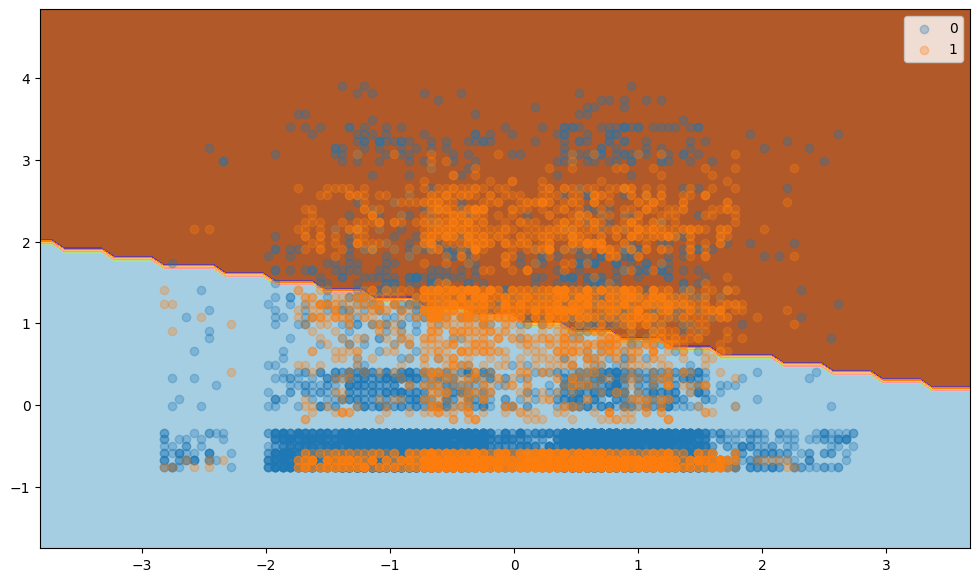

In [ ]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

To samo dla alpha = 0.25

<ipython-input-11-4186072994f5>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.25, label=class_value)


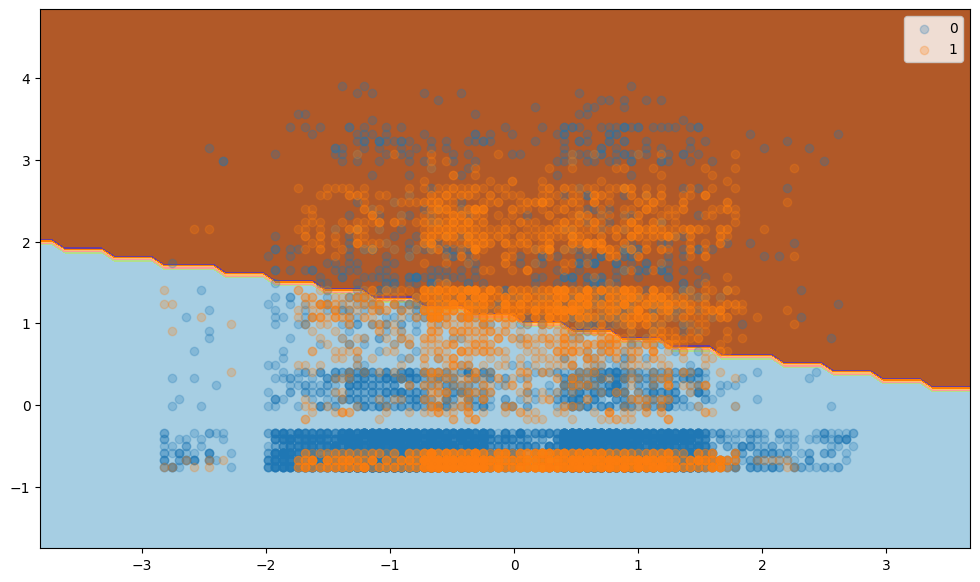

In [ ]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.25, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

In [ ]:
from sklearn.metrics import  f1_score
predictions_lr_train = model_lr.predict(X_train_standardized)
predictions_lr_test = model_lr.predict(X_test_standardized)

print("F1_score_train:", f1_score(y_train, predictions_lr_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_test))

F1_score_train: 0.48869715271786024
F1_score_test: 0.4987120041215868


<ipython-input-11-4186072994f5>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.25, label=class_value)


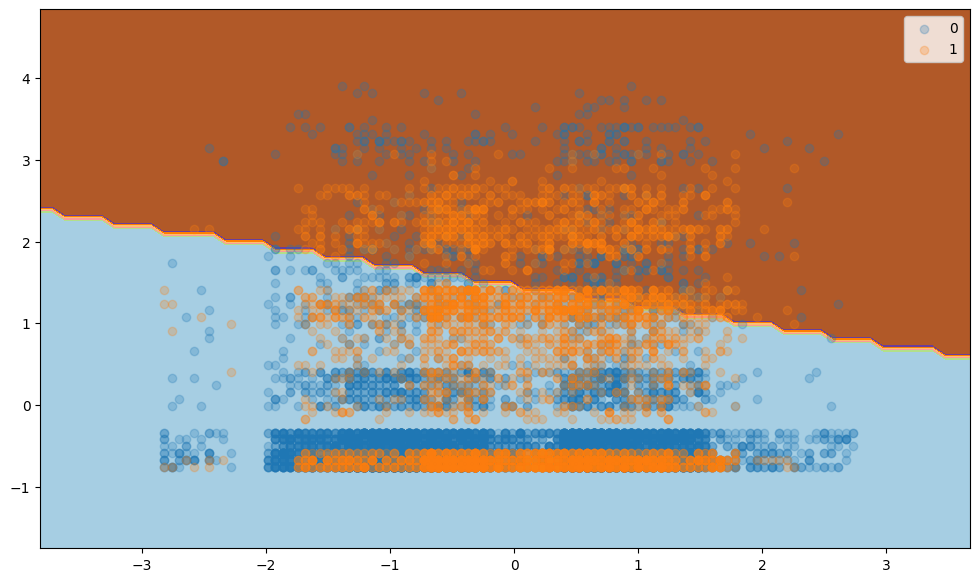

F1_score_train: 0.34417504435245416
F1_score_test: 0.36741767764298094


In [ ]:
model_lr = LogisticRegression(C=1e-3, solver='saga')
model_lr.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)
predictions_lr_train = model_lr.predict(X_train_standardized)
predictions_lr_test = model_lr.predict(X_test_standardized)
print("F1_score_train:", f1_score(y_train, predictions_lr_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_test))

Cóz, jeśli chodzi o rozkład danych do się nie zmienił ale przesunęła się granica ddecyzji

In [ ]:
from sklearn.metrics import  f1_score
predictions_lr_l2_train = model_lr_l2.predict(X_train_standardized)
predictions_lr_l2_test = model_lr_l2.predict(X_test_standardized)

print("F1_score_train:", f1_score(y_train, predictions_lr_l2_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_l2_test))

F1_score_train: 0.48869715271786024
F1_score_test: 0.4987120041215868


<ipython-input-11-4186072994f5>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.25, label=class_value)


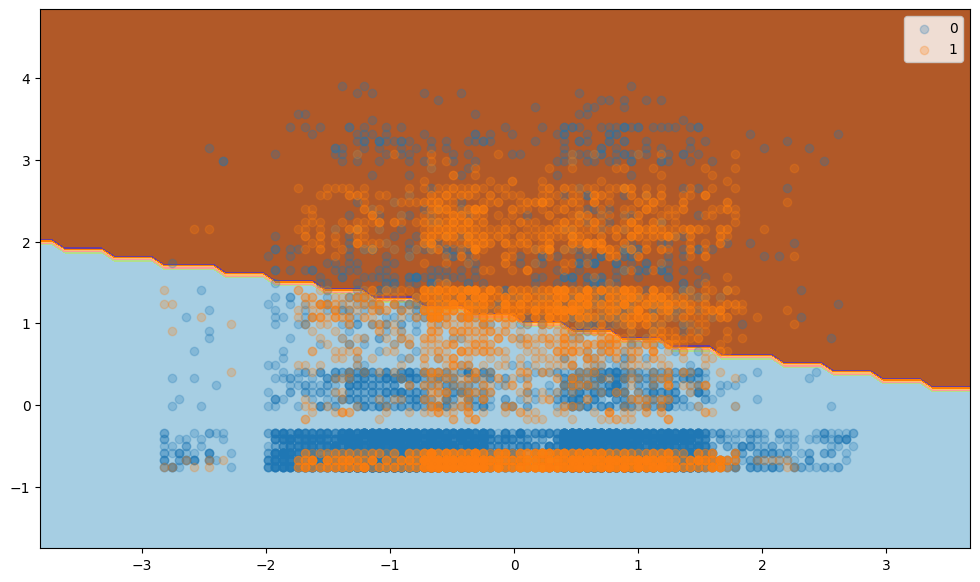

F1_score_train: 0.48869715271786024
F1_score_test: 0.4987120041215868


In [ ]:
model_lr_l2 = LogisticRegression(C=1, penalty='l2', solver='saga')
model_lr_l2.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_l2)
predictions_lr_l1_train = model_lr_l2.predict(X_train_standardized)
predictions_lr_l1_test = model_lr_l2.predict(X_test_standardized)
print("F1_score_train:", f1_score(y_train, predictions_lr_l2_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_l2_test))

<ipython-input-11-4186072994f5>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.25, label=class_value)


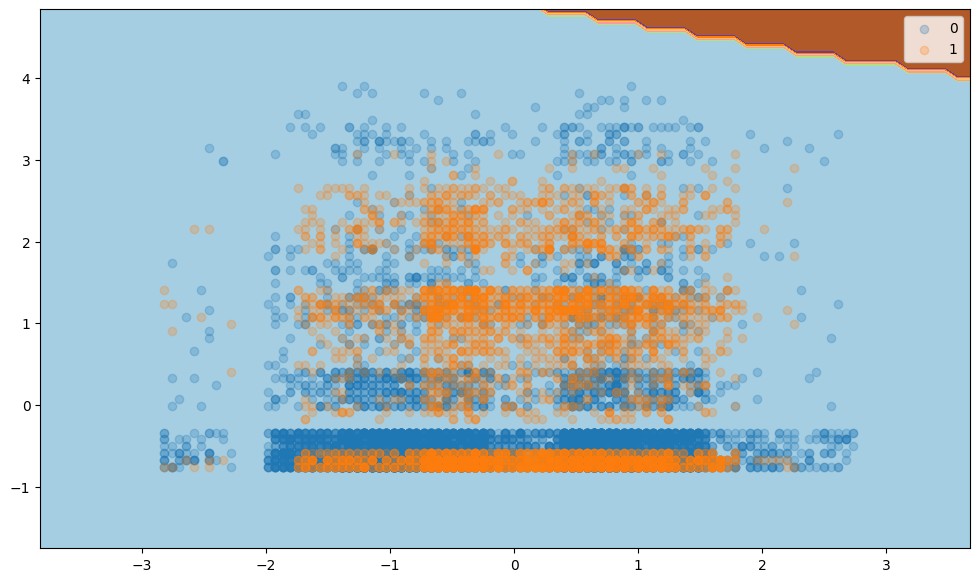

F1_score_train: 0.0
F1_score_test: 0.0


In [ ]:
model_lr_c = LogisticRegression(C=1e-4, solver='saga')
model_lr_c.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_c)
predictions_lr_c_train = model_lr_c.predict(X_train_standardized)
predictions_lr_c_test = model_lr_c.predict(X_test_standardized)
print("F1_score_train:", f1_score(y_train, predictions_lr_c_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_c_test))

Tutaj widać, że jeśli będziemy zmieniali dokładność w zakresie od 1e-1 do 1e-3 to właściwie model się nie zmieni dopiero przy 1e-4 granica decyzji znacząco się przesuwa

<ipython-input-11-4186072994f5>:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.25, label=class_value)


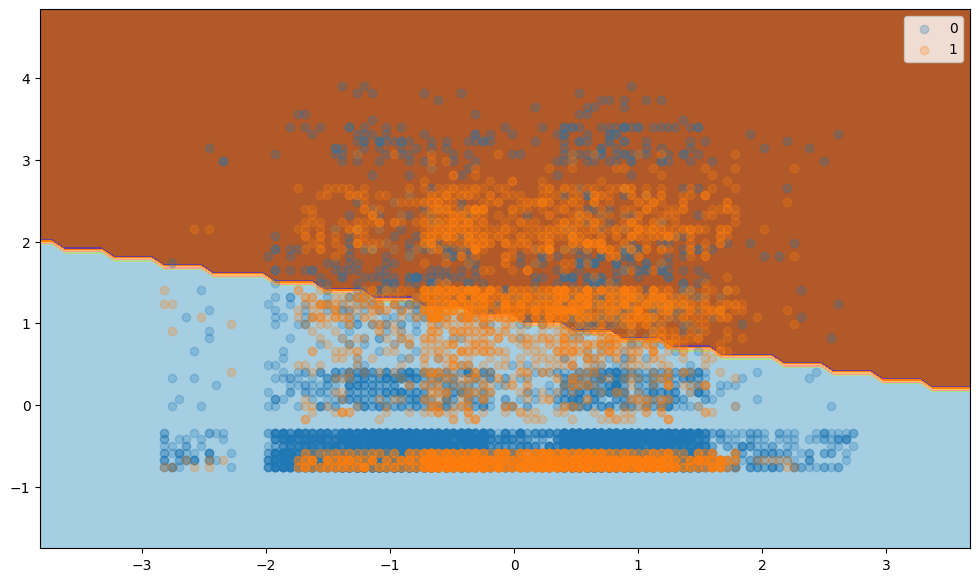

F1_score_train: 0.48869715271786024
F1_score_test: 0.4987120041215868


In [ ]:
model_lr_none = LogisticRegression(penalty=None, solver='saga' )
model_lr_none.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr_none)
predictions_lr_none_train = model_lr_none.predict(X_train_standardized)
predictions_lr_none_test = model_lr_none.predict(X_test_standardized)
print("F1_score_train:", f1_score(y_train, predictions_lr_none_train))
print("F1_score_test:", f1_score(y_test, predictions_lr_none_test))

Penatly o wartości none także nie wpłynęło zbytnio. W moim przypadku najbardziej znaczący jest parametr C